In [2]:
# Script name: Assignment 11
# Purpose of script: Assignment 11
# Author: Minh-Thy Tyler
# Date Created: 
# 11/21/2022
# Notes: N/A
# ---------------------------

import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy import stats
import patsy
import seaborn as sns

# Set up working directory
directory_path = '/Users/minh-thytyler/Desktop/2022-2023/ECON 320/HW' # use / instead of \ or use \ but insert r before (for instance: r'C:\your-directory-path')
os.chdir(directory_path)

## Part 1

In [3]:
#Perform a data generating process of y = B0 + B1 * x + u
birthday = '08182001'
rng = np.random.RandomState(int(birthday))

beta0=9
beta1=8

x = rng.normal(loc=10,scale=1,size=1000000)
u = rng.normal(loc=0,scale=1,size=1000000)
#making u a function of x
uprime = x*u
y = beta0 +beta1*x +uprime

#data variable is in a data frame

data ={"x": x,"y":y, 'uprime':uprime, 'u':u}
data = pd.DataFrame(data)
print(data.head())
print(data.describe())

           x           y     uprime         u
0  10.938747   85.879819 -10.630158 -0.971789
1   9.373442   84.224838   0.237302  0.025316
2   9.834372   85.166520  -2.508455 -0.255070
3  10.289993   85.665495  -5.654446 -0.549509
4  10.603579  104.263681  10.435052  0.984107
                    x               y          uprime               u
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000
mean         9.998355       88.979780       -0.007063       -0.000556
std          1.001314       12.848642       10.059232        1.001204
min          5.170482       36.210090      -53.719248       -4.927307
25%          9.322126       80.055947       -6.702538       -0.675628
50%          9.998102       88.501145       -0.016307       -0.001628
75%         10.674147       97.364511        6.686365        0.674362
max         15.224590      164.884965       52.502017        4.974452


In [4]:
#expected variance for uprime
np.var(uprime)

101.1880489609655

In [5]:
#Simulation on beta1
beta_1_het_list = []
for i in range(1000):
    sample_df = data.sample(n=1000, replace = True, random_state = i)
    reg = smf.ols(formula = 'y~x', data = sample_df).fit()
    beta_1_het_list.append(reg.params[1])
reg_df = pd.DataFrame({'beta1':beta_1_het_list})
print(reg_df.head())

      beta1
0  8.227087
1  8.214330
2  8.177066
3  7.779881
4  8.621313


In [6]:
#finding the expected variance of beta 1
print('The expected variance of beta1 under heterskedasticity: ',np.var(reg_df))

The expected variance of beta1 under heterskedasticity:  beta1    0.098284
dtype: float64


In [5]:
#Perform a data generating process of y = B0 + B1 * x + u
birthday = '08182001'
rng = np.random.RandomState(int(birthday))

beta0=9
beta1=8

x = rng.normal(loc=10,scale=1,size=1000000)
u = rng.normal(loc=0,scale=1,size=1000000)
#making u a function of x
y = beta0 +beta1*x +u

#data variable is in a data frame

datas ={"x": x, "u":u,"y":y}
datas = pd.DataFrame(datas)

beta_1_hom_list = []
for i in range(1000):
    sample_df = datas.sample(n=1000, replace = True, random_state = i)
    reg = smf.ols(formula = 'y~x', data = sample_df).fit()
    beta_1_hom_list.append(reg.params[1])
reg_df = pd.DataFrame({'beta1':beta_1_hom_list})
print(reg_df.head())



      beta1
0  8.009406
1  8.027901
2  8.019268
3  7.988183
4  8.060354


In [6]:
#Empirical variance under homoskedasticity
print('The empirical variance under homoskedasticity is: ',np.var(reg_df))

The empirical variance under homoskedasticity is:  beta1    0.000952
dtype: float64


**Response**

The variace under homoskedasticity is smaller (.000952) than the variance under heteroskedasticity (.098284). When heteroskedasticity is present, OLS is no longer BLUE. In principle, it is possible to find unbiased estimators that have smaller variances than the OLS estimators.

## Part 2

In [7]:
#Perform a data generating process of y = B0 + B1 * x + u
birthday = '08182001'
rng = np.random.RandomState(int(birthday))

#coefficients
b1=int(birthday[0])
b2=int(birthday[1])
b3=int(birthday[2])
b4=int(birthday[3])
b5=int(birthday[4])

u = rng.normal(loc=0,scale=1,size=1000000)


#constructing z
z = np.random.randint(1,6,size = 1000000)

x1 = (z==1)*1
x2 = (z==2)*1
x3 = (z==3)*1
x4 = (z==4)*1
x5 = (z==5)*1


#data variable is in a data frame

pd.DataFrame({'z': z, 'x1':x1, 'x2':x2, 'x3':x3,'x4':x4,'x5':x5}).head(10)

,z,x1,x2,x3,x4,x5
0,3,0,0,1,0,0
1,2,0,1,0,0,0
2,2,0,1,0,0,0
3,2,0,1,0,0,0
4,3,0,0,1,0,0
5,1,1,0,0,0,0
6,3,0,0,1,0,0
7,2,0,1,0,0,0
8,3,0,0,1,0,0
9,1,1,0,0,0,0


In [8]:
d = pd.DataFrame({'x1':x1, 'x2':x2, 'x3':x3,'x4':x4,'x5':x5, 'u':u})

#DGP for y
y = 2.5 + b1*d['x1'] + b2*d['x2'] + b3*d['x3']+ b4*d['x4'] + b5*d['x5'] +u
d['y'] = y

#I will use x1 as the reference group and use x2 to visualize the sampling distribution 


In [9]:
beta2 = []

#omitting x1 for dummy
for i in range(1000):
    res1 = d.sample(n=1000, replace = False, random_state = i)
    ols = smf.ols('y ~ x2 +x3 +x4 +x5', data = res1).fit()
    beta2.append(ols.params[1])

<AxesSubplot:xlabel='beta2', ylabel='Count'>

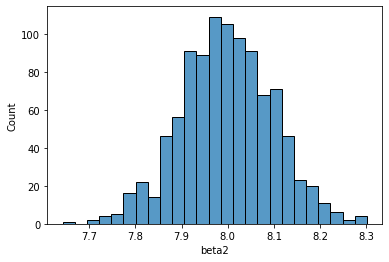

In [17]:
df2 = pd.DataFrame({'beta2':beta2})
sns.histplot(data = df2, x = 'beta2')

The sampling distribution shows that the median value for the sample beta2s is ~8. 